# Investment Analysis Project
Spark Funds wants to make investments in a few companies. My job is to help CEO of spark funds to understand global trends in investments.
#### Spark Fund has two major constraints for investment.

- It wants to invest between 5 to 15 million USD per round of investment  
- It wants to invest only in English-speaking countries because of the ease of communication with the companies it   would invest in.

## Business objective:
The business objectives and goals of data analysis are pretty straightforward.

- __Business objective:__ The objective is to identify the best sectors, countries, and a suitable investment type for making investments. The overall strategy is to invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing'.
- __Goals of data analysis:__  Goals are divided into three sub-goals:
 - _Investment type analysis:_ Comparing the typical investment amounts in the venture, seed, angel, private equity etc. so that Spark Funds can choose the type that is best suited for their strategy.
 -  _Country analysis_: Identifying the countries which have been the most heavily invested in the past. These will be Spark Funds’ favourites as well.
 - _Sector analysis:_ Understanding the distribution of investments across the eight main sectors. (Note that we are interested in the eight 'main sectors' provided in the mapping file. The two files — companies and rounds2 — have numerous sub-sector names; hence, you will need to map each sub-sector to its main sector(first string before the vertical bar will be considered the primary sector.))

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
sns.set(style="white")

In [3]:
#reading files
companies = pd.read_csv('companies.txt', sep='\t', encoding = "ISO-8859-1")
rounds2 = pd.read_csv('rounds2.csv', encoding = "ISO-8859-1" )
mapping = pd.read_csv('mapping.csv')

In [4]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [5]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [6]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


# Checkpoint 1

In [7]:
#counting unique companies in companies by using counting unique(non-null) ID of the company
companies['permalink'].count()

np.int64(66368)

In [8]:
#we can also use following to count distinct values in casae there is any repeatation.
companies['permalink'].nunique()

66368

In [9]:
#converting columns to be merged to same case
companies['permalink'] = companies['permalink'].str.lower()
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower() 
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [10]:
#unique number of companies in rounds2 table
rounds2['company_permalink'].nunique()

66370

In [13]:
#renaming column in rounds2 to merge both dataframes
rounds2 = rounds2.rename(columns={'company_permalink': 'permalink'})
master_frame = pd.merge(rounds2,companies,on='permalink')
master_frame.head()


,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [14]:
master_frame.isnull().sum()

permalink                      0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83803
funded_at                      0
raised_amount_usd          19984
name                           1
homepage_url                6132
category_list               3407
status                         0
country_code                8671
state_code                 10939
region                     10160
city                       10157
founded_at                 20520
dtype: int64

In [15]:
#null value percentage in columns of master_frame
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                   0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
name                        0.00
homepage_url                5.33
category_list               2.96
status                      0.00
country_code                7.54
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64

In [16]:
#Deleting two columns
master_frame = master_frame.drop('funding_round_code', axis=1)
master_frame = master_frame.drop('founded_at', axis=1)

In [17]:
master_frame.head()

,permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing


# Checkpoint 2

In [18]:
#after deletion null value percentage in columns of master_frame
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                   0.00
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.39
name                        0.00
homepage_url                5.33
category_list               2.96
status                      0.00
country_code                7.54
state_code                  9.52
region                      8.84
city                        8.84
dtype: float64

In [19]:
#deleting rows whose entry in column 'raised_amount_usd' is null
master_frame.dropna(subset=['raised_amount_usd'], inplace= True)
master_frame = master_frame.loc[master_frame['status'] !='closed']

In [20]:
#percent number of rows who have more than 3 null values in them
100*(len(master_frame[master_frame.isnull().sum(axis=1) > 3].index) / len(master_frame.index))

5.317224668100065

In [21]:
#Removing rows which have more than 3 null values
master_frame = master_frame[master_frame.isnull().sum(axis=1) <=3]

In [22]:
#null value percentage in columns of master_frame
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                  0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
name                       0.00
homepage_url               3.69
category_list              0.51
status                     0.00
country_code               0.00
state_code                 1.89
region                     1.25
city                       1.25
dtype: float64

In [23]:
#Creatin a dataframe by grouping on 'funding_round_type'
master_grp = master_frame.groupby('funding_round_type')
master_grp['raised_amount_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
funding_round_type,,,,,,,,
angel,3980.0,9.944605e+05,8.099343e+06,0.0,157436.75,415000.0,1.000000e+06,4.945120e+08
convertible_note,1274.0,1.341047e+06,6.087816e+06,0.0,82229.50,300000.0,1.000000e+06,1.500000e+08
debt_financing,6126.0,1.789101e+07,2.925953e+08,0.0,349940.00,1100000.0,4.000000e+06,2.127194e+10
equity_crowdfunding,1125.0,5.117136e+05,1.757552e+06,0.0,5000.00,80148.0,3.390780e+05,2.740000e+07
grant,1862.0,4.286180e+06,2.512328e+07,0.0,62448.25,250000.0,2.000000e+06,7.500000e+08
non_equity_assistance,59.0,4.605890e+05,1.959476e+06,0.0,27000.00,60000.0,1.927670e+05,1.500000e+07
post_ipo_debt,138.0,1.754697e+08,6.296757e+08,70000.0,4017500.00,20000000.0,6.000000e+07,5.800000e+09
post_ipo_equity,547.0,6.709361e+07,2.136634e+08,77.0,3745981.00,12000000.0,3.938415e+07,3.200000e+09
private_equity,1730.0,7.578321e+07,2.061890e+08,0.0,5400000.00,21000000.0,7.682474e+07,4.745460e+09


In [24]:
# compare the median investment amount across the types
master_frame.groupby('funding_round_type')['raised_amount_usd'].median().sort_values(ascending=False)

funding_round_type
secondary_market         60000000.0
private_equity           21000000.0
post_ipo_debt            20000000.0
post_ipo_equity          12000000.0
venture                   5000000.0
debt_financing            1100000.0
undisclosed               1050000.0
angel                      415000.0
seed                       310109.5
convertible_note           300000.0
grant                      250000.0
product_crowdfunding       225889.0
equity_crowdfunding         80148.0
non_equity_assistance       60000.0
Name: raised_amount_usd, dtype: float64

The median investment amount for type 'private_equity' is approx. USD 20m, which is beyond Spark Funds' range of 5-15m. The median of 'venture' type is about USD 5m, which is suitable for them. The average amounts of angel and seed types are lower than their range.

Thus, 'venture' type investment will be most suited to them.

# Checkpoint 3

In [25]:
master_frame_venture = master_frame.loc[master_frame['funding_round_type']=='venture']

In [26]:
vent_country_group = master_frame_venture.pivot_table(values= 'raised_amount_usd',
                                                     index = 'country_code',
                                                     aggfunc = 'sum')
vent_country_group

,raised_amount_usd
country_code,
ARE,3.426175e+08
ARG,3.042888e+08
ARM,2.651750e+07
AUS,1.252745e+09
AUT,5.642971e+08
...,...
UKR,1.129246e+07
URY,1.983000e+07
USA,3.999305e+11


In [27]:
temp_top9 = vent_country_group.sort_values('raised_amount_usd',ascending= False)

In [28]:
temp_top9.reset_index(level=['country_code'],inplace=True)

In [29]:
temp_top9= temp_top9[0:9]
temp_top9

,country_code,raised_amount_usd
0,USA,3.999305e+11
1,CHN,3.906671e+10
2,GBR,1.818328e+10
3,IND,1.405060e+10
4,CAN,8.825487e+09
5,FRA,6.775044e+09
6,ISR,6.490721e+09
7,DEU,6.053973e+09
8,JPN,3.237132e+09


In [30]:
top9 = temp_top9.loc[:,'country_code']


In [107]:
top9

0    USA
1    CHN
2    GBR
3    IND
4    CAN
5    FRA
6    ISR
7    DEU
8    JPN
Name: country_code, dtype: object

In [31]:
eng_countries = ['USA','GBR', 'IND']


English speaking countries are United States of America(USA), United Kingdom(GBR), India(IND)

In [32]:
## Funding type that I want to advise to invest in is venture
FT = 'venture'

# Checkpoint 4

In [33]:
master_frame['primary_sector'] = master_frame["category_list"].str.split("|").str[0]

In [34]:
#converting the matrix mapping of primary_sector-category to one-one column format
mapping = mapping.loc[mapping['category_list'].notnull()]
mapping =mapping.set_index('category_list')
map_frame = mapping.stack().reset_index()
map_frame.columns=['primary_sector','main_sector','bin']


In [35]:
map_frame = map_frame.loc[map_frame['bin']==1]

In [39]:
map_frame = map_frame.drop('bin', axis=1)
map_frame

KeyError: "['bin'] not found in axis"

In [40]:
#merging primary_sector-main_sector with master_frame
master_frame2 = pd.merge(master_frame, map_frame, on='primary_sector')

In [41]:
master_frame2 = master_frame2.loc[master_frame2['funding_round_type']=='venture']

In [42]:
master_frame2.head()

,permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,Media,Entertainment
2,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,Curated Web,"News, Search and Messaging"
5,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,Biotechnology,Cleantech / Semiconductors
11,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,Apps,"News, Search and Messaging"
17,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,09-10-2014,4000000.0,10 Minutes With,http://10minuteswith.com,Education,operating,GBR,H9,London,London,Education,Others


In [43]:
D1_temp = master_frame2.loc[(master_frame2['country_code']=='USA') & (master_frame2['raised_amount_usd']>= 5000000) & (master_frame2['raised_amount_usd']<= 15000000)]

In [44]:
D1 = copy.copy(D1_temp)

In [45]:
D1['no_invt_sec'] = D1.groupby('main_sector')['main_sector'].transform('count')

In [46]:
D1['total_invt_sec'] = D1.groupby('main_sector')['raised_amount_usd'].transform('sum')

In [122]:
#total number of investments in C1
D1['funding_round_permalink'].count()

10404

In [123]:
#total amount of investment in C1
D1['raised_amount_usd'].sum()

93176222534.0

In [81]:
#No. of investment wise first,second and third sector in C1
D1_plt = D1.drop_duplicates(subset='main_sector', keep="last")
frm1 = D1_plt.nlargest(3,'no_invt_sec')
frm1.loc[:,'main_sector':'no_invt_sec']

,main_sector,no_invt_sec
76581,Others,2732
76676,Cleantech / Semiconductors,2145
76659,"Social, Finance, Analytics, Advertising",1813


In [82]:
D1_h1 = D1.loc[(D1['main_sector']=='Others') & (D1['raised_amount_usd']==D1['raised_amount_usd'].max())]
D1_h1.head()

,permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,primary_sector,main_sector,no_invt_sec,total_invt_sec
114,/organization/1stdibs,/funding-round/292b074d073fdd9c7e9d8f372c3aa5f6,venture,24-01-2014,15000000.0,1stdibs,http://www.1stdibs.com,E-Commerce,operating,USA,NY,New York City,New York,E-Commerce,Others,2732,2.441447e+10
2289,/organization/agari-data,/funding-round/08f7137c4fd52f6e9a4852ee9a765e23,venture,23-09-2014,15000000.0,Agari,http://www.agari.com,SaaS|Security,operating,USA,CA,SF Bay Area,San Mateo,SaaS,Others,2732,2.441447e+10
2821,/organization/akorri,/funding-round/5a9ada593b969a2b814a7f040f22af89,venture,10-09-2007,15000000.0,Akorri Networks,http://www.akorri.com,Software,acquired,USA,MA,Boston,Littleton,Software,Others,2732,2.441447e+10
4430,/organization/appcelerator,/funding-round/a3cf130fb3f34ee77aa3ad1c1a730c6a,venture,01-11-2011,15000000.0,Appcelerator,http://appcelerator.com,Enterprise Software|Mobile|Mobility|Open Source,operating,USA,CA,SF Bay Area,Mountain View,Enterprise Software,Others,2732,2.441447e+10
4693,/organization/approva,/funding-round/852095203f5ab885d6f45adc627ceaa0,venture,01-04-2005,15000000.0,Approva,http://www.approva.net,Enterprise Software,acquired,USA,VA,"Washington, D.C.",Reston,Enterprise Software,Others,2732,2.441447e+10


In [83]:
D1_h2 = D1.loc[(D1['main_sector']=='Cleantech / Semiconductors') & (D1['raised_amount_usd']==D1['raised_amount_usd'].max())]
D1_h2.head()

,permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,primary_sector,main_sector,no_invt_sec,total_invt_sec
411,/organization/480-biomedical,/funding-round/23d30096c6c31691dff8ff1b782eeba2,venture,14-02-2012,15000000.0,480 Biomedical,http://www.480biomedical.com,Biotechnology,operating,USA,MA,Boston,Watertown,Biotechnology,Cleantech / Semiconductors,2145,1.972990e+10
909,/organization/acadia-pharmaceuticals,/funding-round/c3b4f7b8fa5d4c1aa1ce27005623a969,venture,11-01-2011,15000000.0,ACADIA Pharmaceuticals,http://www.acadia-pharm.com,Biotechnology|Health Care,ipo,USA,CA,San Diego,San Diego,Biotechnology,Cleantech / Semiconductors,2145,1.972990e+10
1323,/organization/active-implants,/funding-round/fad6ae551961c31cb509a85cc4b65761,venture,02-12-2009,15000000.0,Active Implants,http://www.activeimplants.com,Biotechnology,operating,USA,TN,Memphis,Memphis,Biotechnology,Cleantech / Semiconductors,2145,1.972990e+10
1375,/organization/acton-pharmaceuticals,/funding-round/e7f8c0b814873d9fae73faaf24f4cf19,venture,06-01-2010,15000000.0,Acton Pharmaceuticals,http://actonpharmaceuticals.com,Biotechnology,acquired,USA,MA,Boston,Marlborough,Biotechnology,Cleantech / Semiconductors,2145,1.972990e+10
1869,/organization/advanced-analogic-technologies,/funding-round/ba5ecf12e236fc0f5527a0bf920f31ea,venture,20-01-2004,15000000.0,Advanced Analogic Technologies,http://www.analogictech.com,Semiconductors,acquired,USA,NM,NM - Other,Santa Clara,Semiconductors,Cleantech / Semiconductors,2145,1.972990e+10


In [84]:
D2_temp = master_frame2.loc[(master_frame2['country_code']=='GBR') & (master_frame2['raised_amount_usd']>= 5000000) & (master_frame2['raised_amount_usd']<= 15000000)]

In [85]:
D2 = copy.copy(D2_temp)

In [86]:
D2['no_invt_sec'] = D2.groupby('main_sector')['main_sector'].transform('count')

In [87]:
D2['total_invt_sec'] = D2.groupby('main_sector')['raised_amount_usd'].transform('sum')

In [88]:
#total number of investments in C2
D2['funding_round_permalink'].count()

np.int64(542)

In [89]:
D2['raised_amount_usd'].sum()

np.float64(4728734985.0)

In [90]:
#No. of investment wise first,second and third sector in C2
D2_plt = D2.drop_duplicates(subset='main_sector', keep="last")
frm2 = D2_plt.nlargest(3,'no_invt_sec')
frm2.loc[:,'main_sector':'no_invt_sec']


,main_sector,no_invt_sec
76661,Others,137
76175,Cleantech / Semiconductors,114
75241,"Social, Finance, Analytics, Advertising",95


In [91]:
D2_h1 = D2.loc[(D2['main_sector']=='Others') & (D2['raised_amount_usd']==D2['raised_amount_usd'].max())]
D2_h1

,permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,primary_sector,main_sector,no_invt_sec,total_invt_sec
6839,/organization/azure-solutions,/funding-round/adb99f479490e33281ab358ba9da2b29,venture,16-06-2005,15000000.0,Azure Solutions,http://www.azuresolutions.com,Software,acquired,GBR,H9,London,London,Software,Others,137,1.189442e+09
21900,/organization/environmentiq,/funding-round/75dfc6681d2f93780158aff5fd9efcde,venture,06-03-2006,15000000.0,EnvironmentIQ,NaN,Software,operating,GBR,C3,London,Cambridge,Software,Others,137,1.189442e+09
33343,/organization/ip-access,/funding-round/4321163564fddf7a26b7235d7c791941,venture,12-12-2011,15000000.0,ip.access,http://www.ipaccess.com,Software,operating,GBR,C6,Camborne,Camborne,Software,Others,137,1.189442e+09
45769,/organization/notonthehighstreet,/funding-round/1699ed5949d4d06bce01be9da7d9863f,venture,21-05-2012,15000000.0,Notonthehighstreet,http://www.notonthehighstreet.com,E-Commerce,operating,GBR,L1,London,Richmond,E-Commerce,Others,137,1.189442e+09
58564,/organization/sensage,/funding-round/39314de678e7cdba9b1b7390d23bc394,venture,09-04-2008,15000000.0,SenSage,http://www.sensage.com,Security,acquired,GBR,B3,London,Bracknell,Security,Others,137,1.189442e+09
59942,/organization/silverrail-technologies,/funding-round/6816b97b970b7b95395f903ce1dd6d0d,venture,21-03-2012,15000000.0,SilverRail Technologies,http://silverrailtech.com,Technology|Transportation|Travel,operating,GBR,H9,London,London,Technology,Others,137,1.189442e+09
68490,/organization/tribold,/funding-round/36c8164caf2a5283a766e2a85b9d663c,venture,22-03-2007,15000000.0,Tribold,http://www.tribold.com,Software,acquired,GBR,H9,London,London,Software,Others,137,1.189442e+09


In [92]:
D2_h2 = D2.loc[(D2['main_sector']=='Cleantech / Semiconductors') & (D2['raised_amount_usd']==D2['raised_amount_usd'].max())]
D2_h2

,permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,primary_sector,main_sector,no_invt_sec,total_invt_sec
21024,/organization/elixent,/funding-round/11039f250826f795bfb1939629708907,venture,06-04-2005,15000000.0,Elixent,https://www.elixent.com,Semiconductors,operating,GBR,B7,Bristol,Bristol,Semiconductors,Cleantech / Semiconductors,114,1.028029e+09


In [93]:
D3_temp = master_frame2.loc[(master_frame2['country_code']=='IND') & (master_frame2['raised_amount_usd']>= 5000000) & (master_frame2['raised_amount_usd']<= 15000000)]

In [94]:
D3 = copy.copy(D3_temp)

In [95]:
D3['no_invt_sec'] = D3.groupby('main_sector')['main_sector'].transform('count')

In [96]:
D3['total_invt_sec'] = D3.groupby('main_sector')['raised_amount_usd'].transform('sum')

In [97]:
#total number of investments in C3
D3['funding_round_permalink'].count()

np.int64(287)

In [98]:
D3['raised_amount_usd'].sum()

np.float64(2569667552.0)

In [99]:
D3_plt = D3.drop_duplicates(subset='main_sector', keep="last")
frm3 = D3_plt.nlargest(3,'no_invt_sec')
frm3.loc[:,'main_sector':'no_invt_sec']

,main_sector,no_invt_sec
76357,Others,102
76449,"News, Search and Messaging",49
75290,"Social, Finance, Analytics, Advertising",32


In [100]:
D3_h1 = D3.loc[(D3['main_sector']=='Others') & (D3['raised_amount_usd']==D3['raised_amount_usd'].max())]
D3_h1.head()

,permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,primary_sector,main_sector,no_invt_sec,total_invt_sec
11555,/organization/caratlane,/funding-round/ead9f057edb0d007c54f76e5cf5f2375,venture,13-05-2013,15000000.0,CaratLane,http://www.caratlane.com,E-Commerce|Jewelry,operating,IND,25,Chennai,Chennai,E-Commerce,Others,102,934289507.0
13792,/organization/classteacher-learning-systems,/funding-round/8be54e916f26b7702504530e6719305f,venture,27-06-2011,15000000.0,Classteacher Learning Systems,http://www.classteacher.com,EdTech|Education,operating,IND,10,New Delhi,Gurgaon,EdTech,Others,102,934289507.0
15170,/organization/commonfloor,/funding-round/2d3d9f68e6902613d06d2aa77852381c,venture,08-01-2015,15000000.0,CommonFloor,http://www.commonfloor.com,Real Estate,operating,IND,19,Bangalore,Bangalore,Real Estate,Others,102,934289507.0
24133,/organization/firstcry-com,/funding-round/23b1769412d24510dfc7a56ab1f12e4d,venture,21-01-2014,15000000.0,FirstCry.com,http://www.firstcry.com,E-Commerce,operating,IND,16,Pune,Pune,E-Commerce,Others,102,934289507.0
26776,/organization/girnarsoft,/funding-round/f5be3a7b98fb70b0e2b1d019357dd782,venture,20-11-2013,15000000.0,GirnarSoft,http://www.girnarsoft.com,Enterprise Software|Mobile Software Tools|Mobi...,operating,IND,24,Jaipur,Jaipur,Enterprise Software,Others,102,934289507.0


In [101]:
D3_h2 = D3.loc[(D3['main_sector']=='News, Search and Messaging') & (D3['raised_amount_usd']==D3['raised_amount_usd'].max())]
D3_h2

,permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,primary_sector,main_sector,no_invt_sec,total_invt_sec
42019,/organization/mobile2win-india,/funding-round/50396c66ef239f1d5afea76ca98a76c4,venture,13-11-2006,15000000.0,Mobile2Win India,http://www.mobile2win.com,Mobile,operating,IND,16,Mumbai,Mumbai,Mobile,"News, Search and Messaging",49,408834545.0


# Checkponit 5

A plot showing the fraction of total investments (globally) in venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

In [102]:
chart1 = master_grp['raised_amount_usd'].describe()


In [103]:
chart1.reset_index(level=['funding_round_type'],inplace=True)

In [104]:
total_count = chart1['count'].sum()

In [105]:
total_count

np.float64(83229.0)

In [106]:
chart1['fraction'] = chart1['count']/total_count

In [107]:
investment_given =['venture','private_equity','seed']

In [108]:
chart1.head()

,funding_round_type,count,mean,std,min,25%,50%,75%,max,fraction
0,angel,3980.0,9.944605e+05,8.099343e+06,0.0,157436.75,415000.0,1000000.0,4.945120e+08,0.047820
1,convertible_note,1274.0,1.341047e+06,6.087816e+06,0.0,82229.50,300000.0,1000000.0,1.500000e+08,0.015307
2,debt_financing,6126.0,1.789101e+07,2.925953e+08,0.0,349940.00,1100000.0,4000000.0,2.127194e+10,0.073604
3,equity_crowdfunding,1125.0,5.117136e+05,1.757552e+06,0.0,5000.00,80148.0,339078.0,2.740000e+07,0.013517
4,grant,1862.0,4.286180e+06,2.512328e+07,0.0,62448.25,250000.0,2000000.0,7.500000e+08,0.022372


In [109]:
chart1_plt = chart1.loc[chart1['funding_round_type'].isin(investment_given)]

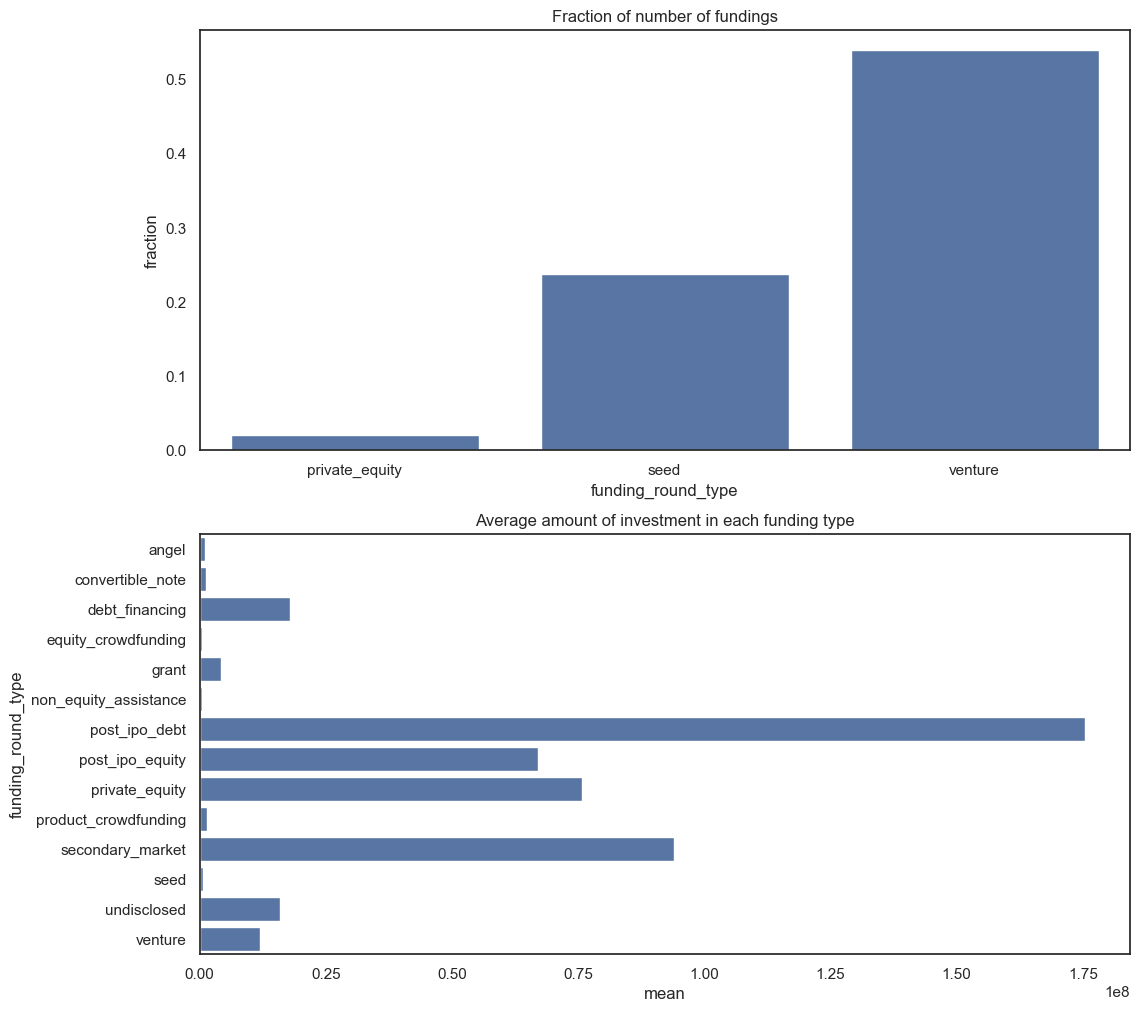

In [110]:
plt.figure(figsize=(12, 12))
#Fraction of number of fundings
plt.subplot(2,1,1)
sns.barplot(x='funding_round_type', y='fraction', data=chart1_plt)
plt.title("Fraction of number of fundings")
#average amount of investment in each funding type
plt.subplot(2,1,2)
sns.barplot(y='funding_round_type', x='mean', data=chart1)
plt.title("Average amount of investment in each funding type")
plt.show()


A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

In [111]:
temp_top9

,country_code,raised_amount_usd
0,USA,3.999305e+11
1,CHN,3.906671e+10
2,GBR,1.818328e+10
3,IND,1.405060e+10
4,CAN,8.825487e+09
5,FRA,6.775044e+09
6,ISR,6.490721e+09
7,DEU,6.053973e+09
8,JPN,3.237132e+09


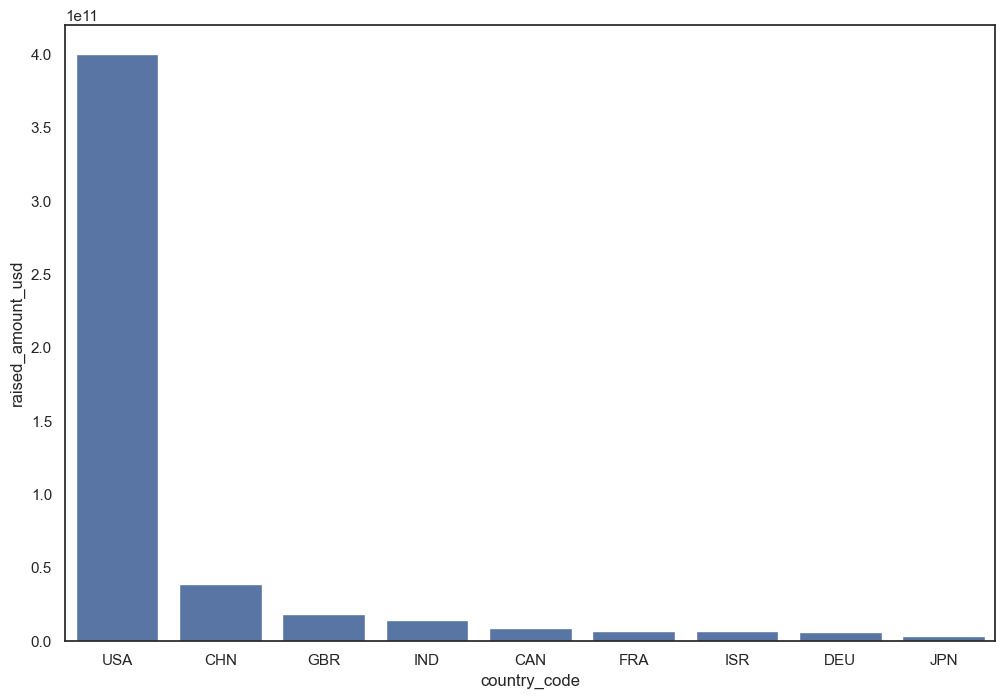

In [112]:
plt.figure(figsize=(12, 8))
sns.barplot(x='country_code', y='raised_amount_usd', data=temp_top9)
plt.show()

    A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). 

 

In [113]:
main_frm = pd.concat([frm1, frm2, frm3 ], axis = 0)
main_frm

,permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,primary_sector,main_sector,no_invt_sec,total_invt_sec
76581,/organization/zuniversity-com,/funding-round/a058abef15e17654e754acd8d4303af8,venture,10-01-2001,10000000.0,zUniversity,http://zuniversity.com/,Education,operating,USA,CT,Hartford,Stamford,Education,Others,2732,2.441447e+10
76676,/organization/zystor,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,16-12-2004,8500000.0,Zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,Biotechnology,Cleantech / Semiconductors,2145,1.972990e+10
76659,/organization/zynga,/funding-round/eb198261da812bc8d3bf475ccec44000,venture,12-02-2008,5026000.0,Zynga,http://www.zynga.com,Facebook Applications|Games|Networking|Technology,ipo,USA,CA,SF Bay Area,San Francisco,Facebook Applications,"Social, Finance, Analytics, Advertising",1813,1.590572e+10
76661,/organization/zynstra,/funding-round/05f43b37c270f5919578281ce803de8f,venture,09-07-2014,8400000.0,Zynstra,http://www.zynstra.com,Software,operating,GBR,A4,Bath,Bath,Software,Others,137,1.189442e+09
76175,/organization/ziarco-pharma,/funding-round/e5e2ac7f47b48ed2c0369a04a8c7a364,venture,05-11-2012,6000000.0,Ziarco Pharma,http://www.ziarcopharma.com,Biotechnology,operating,GBR,G5,Kent,Kent,Biotechnology,Cleantech / Semiconductors,114,1.028029e+09
75241,/organization/yd-world,/funding-round/be0839379302fe4cca23ced560c8cb62,venture,16-09-2013,5918360.0,Yieldr,http://yieldr.com,Advertising|Internet Marketing|Real Time,operating,GBR,H9,London,London,Advertising,"Social, Finance, Analytics, Advertising",95,7.976084e+08
76357,/organization/zo-rooms,/funding-round/c88cfb5fe8cc31d33a07b73aa97c0e04,venture,20-07-2015,15000000.0,ZO Rooms,http://bit.ly/1HTcZ90,Hospitality|Hotels,operating,IND,7,New Delhi,New Delhi,Hospitality,Others,102,9.342895e+08
76449,/organization/zoomo,/funding-round/473111947c0915402be71b8b61ec62f6,venture,02-07-2015,5000000.0,Zoomo,http://www.gozoomo.com/,Internet,operating,IND,19,Bangalore,Bangalore,Internet,"News, Search and Messaging",49,4.088345e+08
75290,/organization/yepme-com,/funding-round/cf179033074390a33c0b1cdc3a9f14b9,venture,09-01-2015,12700000.0,yepme.com,http://yepme.com,Brand Marketing|Online Shopping|Product Design,operating,IND,10,New Delhi,Gurgaon,Brand Marketing,"Social, Finance, Analytics, Advertising",32,2.905435e+08


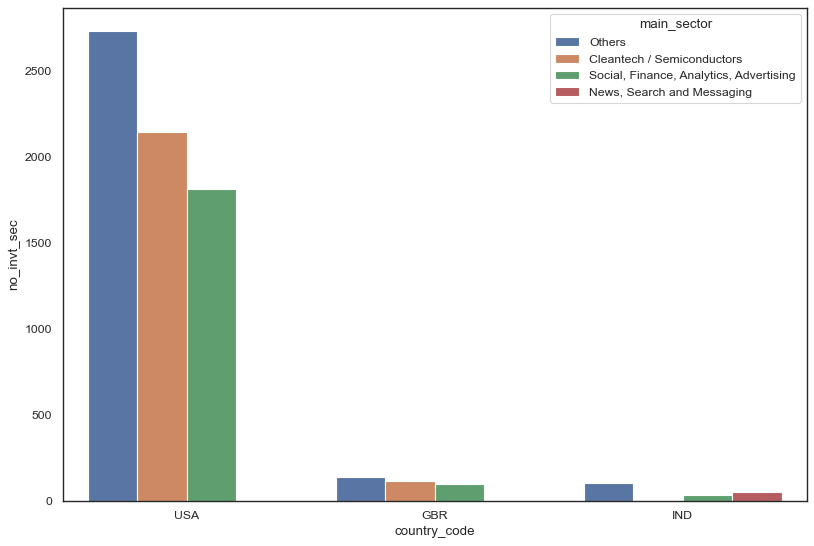

In [114]:
# set figure size for larger figure
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
sns.barplot(x='country_code', y='no_invt_sec', hue="main_sector", data=main_frm)
plt.show()